<a href="https://colab.research.google.com/github/ConanOReilly/monthlyHouseSalesLondon/blob/main/propertySalesLondon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [7]:
library(readxl)
m <- read_excel('monthlyHouseSalesL.xlsx')
m

housesSold
<dbl>
7506
6873
9639
8053
9293
10150
9445
9965
9249


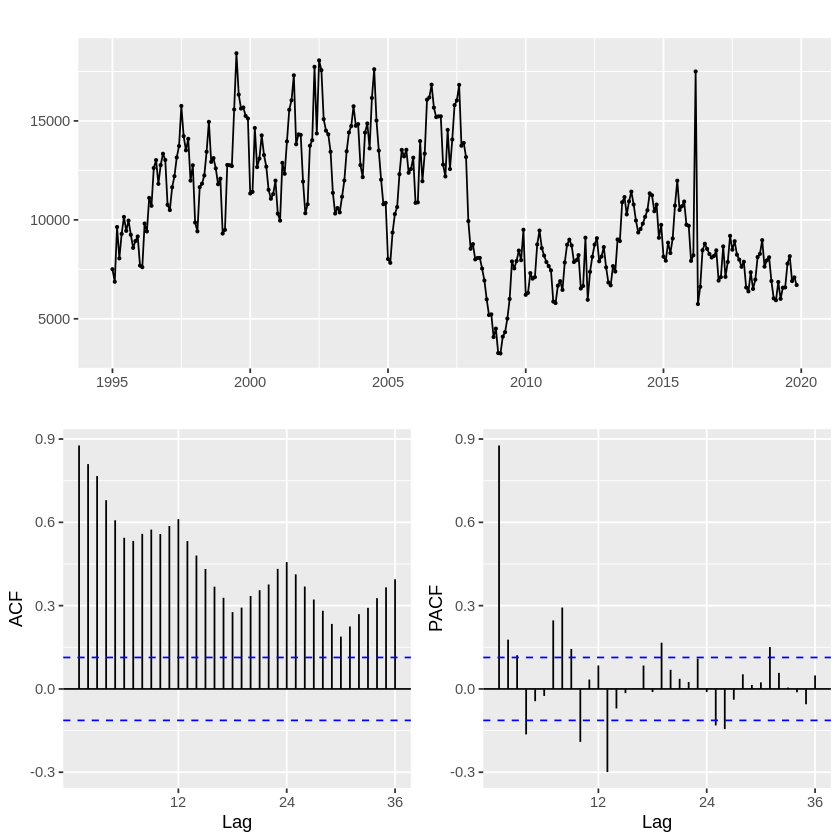

In [8]:
m <- ts(m$housesSold, start = 1995, frequency = 12)
ggtsdisplay(m)

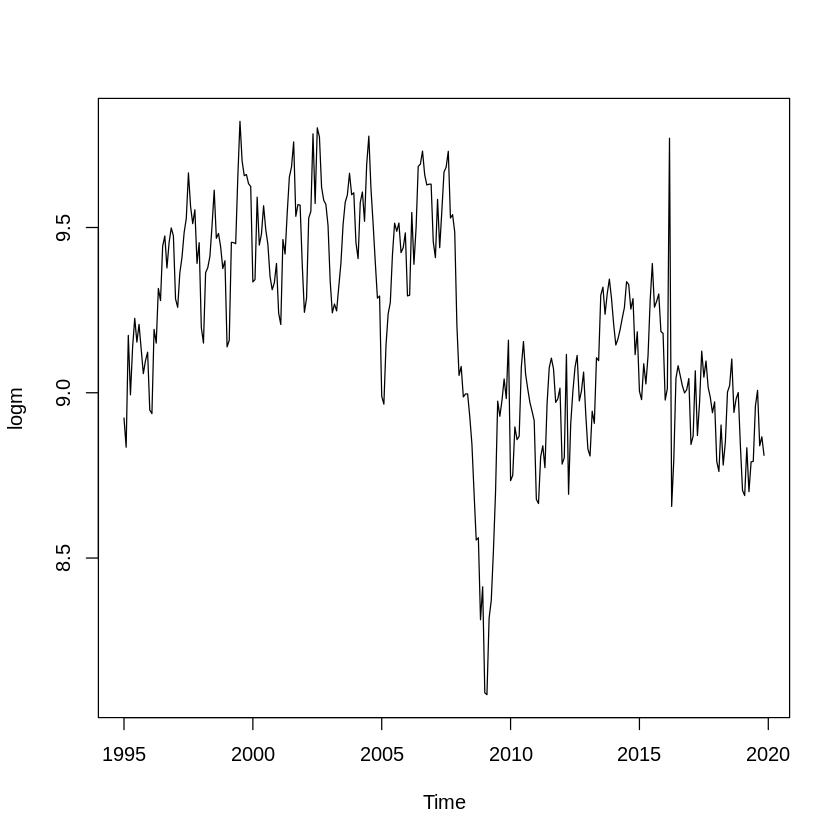

In [5]:
logm = log(m)
plot(logm)

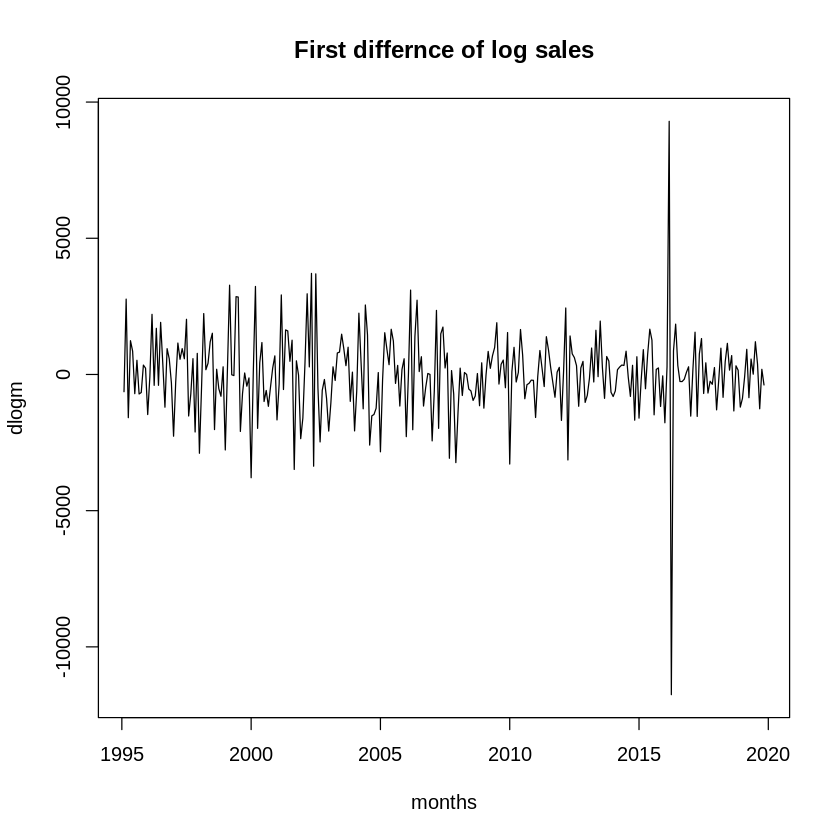

In [21]:
dlogm = diff(m,d=1)

plot(dlogm,main="First differnce of log sales", xlab="months")

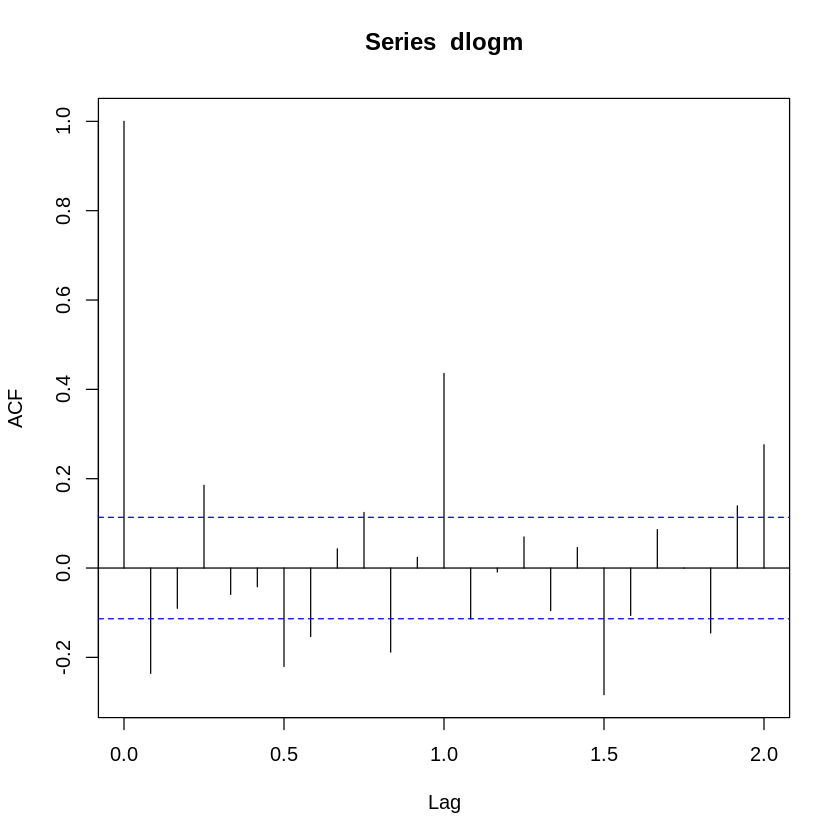

In [23]:
acf(dlogm)

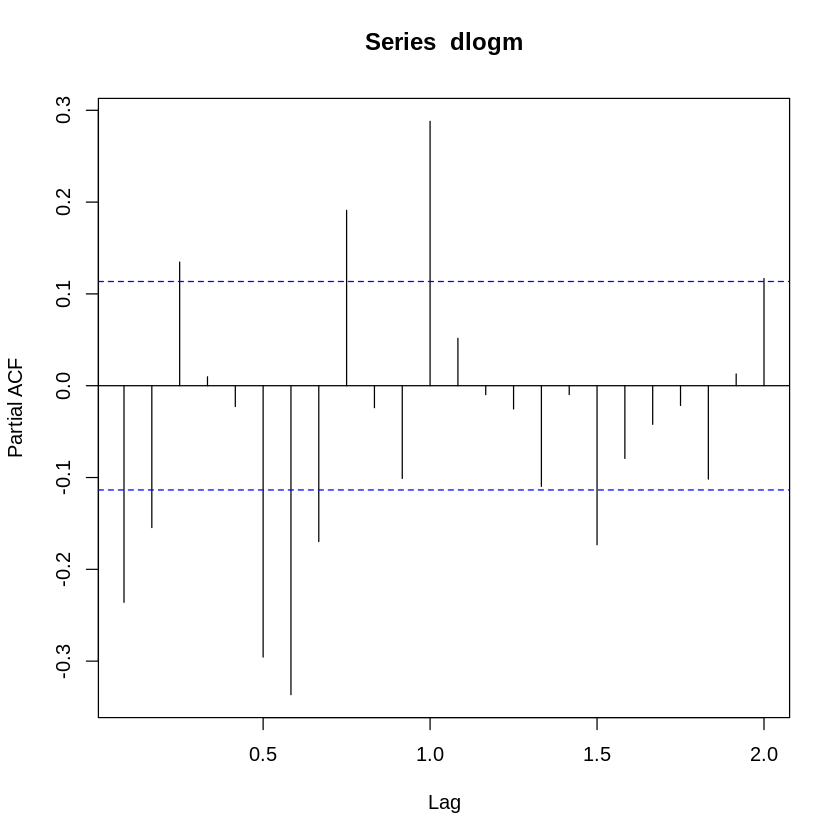

In [24]:
pacf(dlogm)

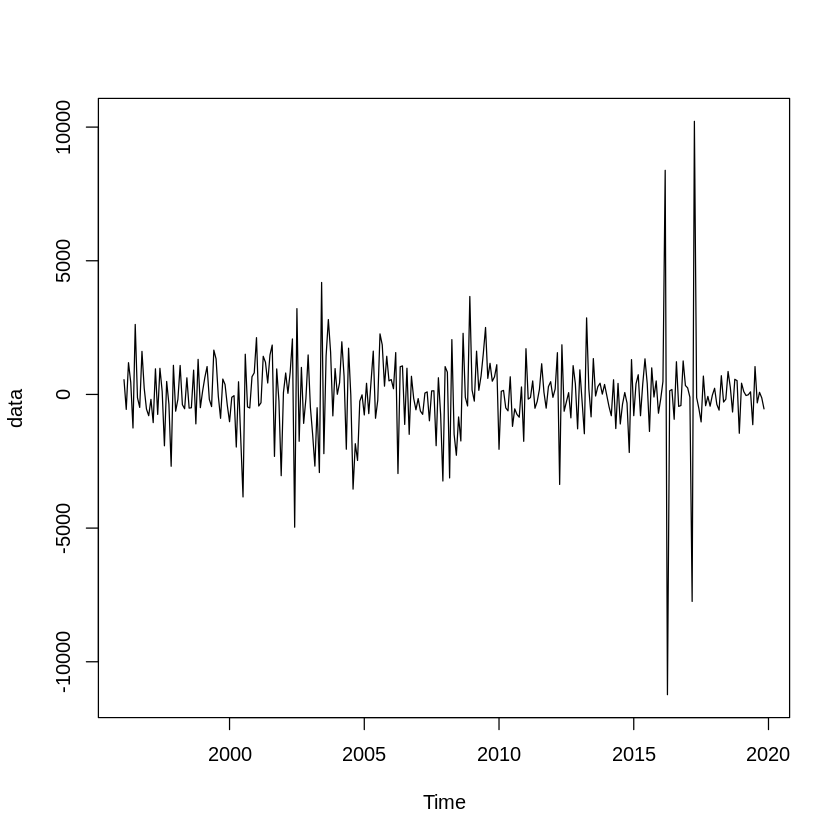

In [25]:
data= diff(dlogm,12)
plot(data)

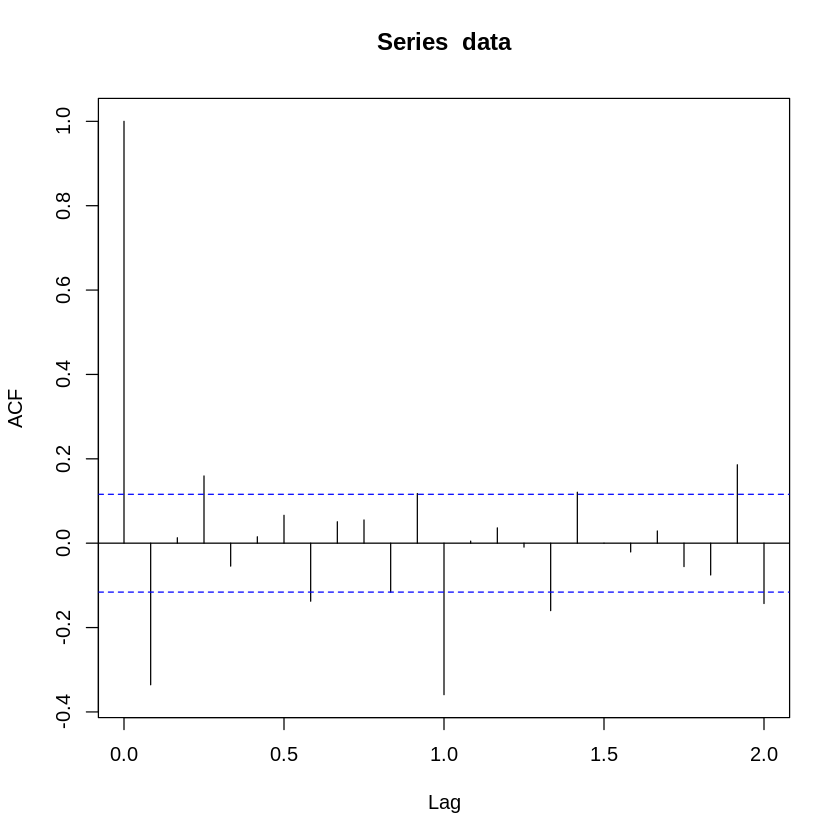

In [26]:
acf(data)

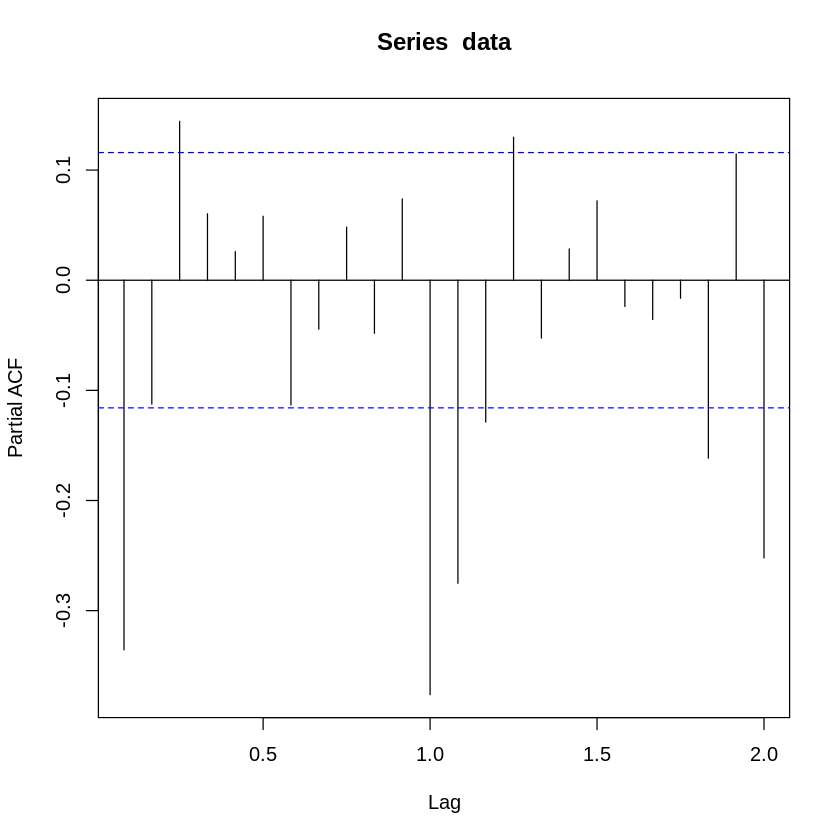

In [27]:
pacf(data)

In [43]:
d=1
DD=1
per=12
model_number=0
for(p in 1:2){
 for(q in 1:2){
  for(P in 1:2){
   for(Q in 1:2){
    if(p+d+q+P+DD+Q<=10){
      model_number=model_number+1
      model<-arima(x=log(m),
                  order = c((p-1),d,(q-1)),
                  seasonal =list(order=c((P-1),DD,(Q-1)),
                  period=per))

      pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
      
      sse<-sum(model$residuals^2)
      
      cat(model_number,"- SARIMA(",p-1,d,q-1,P-1,DD,Q-1,per,")", 'AIC=', 
      model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
    }
   }
  }
 }
}

1 - SARIMA( 0 1 0 0 1 0 12 ) AIC= -277.4861  SSE= 6.303216  p-VALUE= 1.847468e-07 
2 - SARIMA( 0 1 0 0 1 1 12 ) AIC= -412.4368  SSE= 3.576967  p-VALUE= 4.022394e-11 
3 - SARIMA( 0 1 0 1 1 0 12 ) AIC= -312.3074  SSE= 5.512334  p-VALUE= 7.051626e-11 
4 - SARIMA( 0 1 0 1 1 1 12 ) AIC= -412.9144  SSE= 3.411486  p-VALUE= 3.789367e-10 
5 - SARIMA( 0 1 1 0 1 0 12 ) AIC= -300.4809  SSE= 5.774361  p-VALUE= 0.0007874143 
6 - SARIMA( 0 1 1 0 1 1 12 ) AIC= -450.7582  SSE= 3.132956  p-VALUE= 0.0006931065 
7 - SARIMA( 0 1 1 1 1 0 12 ) AIC= -349.5606  SSE= 4.792039  p-VALUE= 8.521385e-05 
8 - SARIMA( 0 1 1 1 1 1 12 ) AIC= -448.8473  SSE= 3.12624  p-VALUE= 0.0007768722 
9 - SARIMA( 1 1 0 0 1 0 12 ) AIC= -302.8733  SSE= 5.725807  p-VALUE= 0.001745198 
10 - SARIMA( 1 1 0 0 1 1 12 ) AIC= -450.4607  SSE= 3.145757  p-VALUE= 0.0004068235 
11 - SARIMA( 1 1 0 1 1 0 12 ) AIC= -350.4367  SSE= 4.778913  p-VALUE= 0.0001027303 
12 - SARIMA( 1 1 0 1 1 1 12 ) AIC= -448.726  SSE= 3.13443  p-VALUE= 0.0005660059 
13 - 

In [44]:
model<-arima(x=log(m),
                  order = c(0,1,1),
                  seasonal =list(order=c(0,1,1),
                  period=per))
model


Call:
arima(x = log(m), order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = per))

Coefficients:
          ma1     sma1
      -0.3428  -0.9222
s.e.   0.0464   0.0450

sigma^2 estimated as 0.01095:  log likelihood = 228.38,  aic = -450.76


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 94.802, df = 22, p-value = 5.154e-11

Model df: 2.   Total lags used: 24



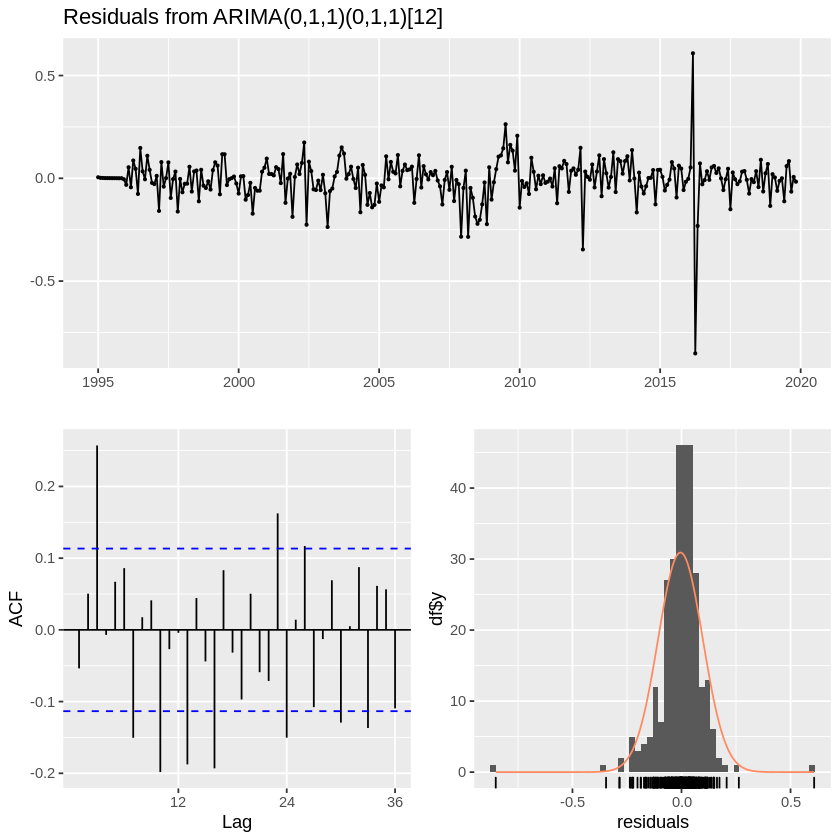

In [45]:
checkresiduals(model)

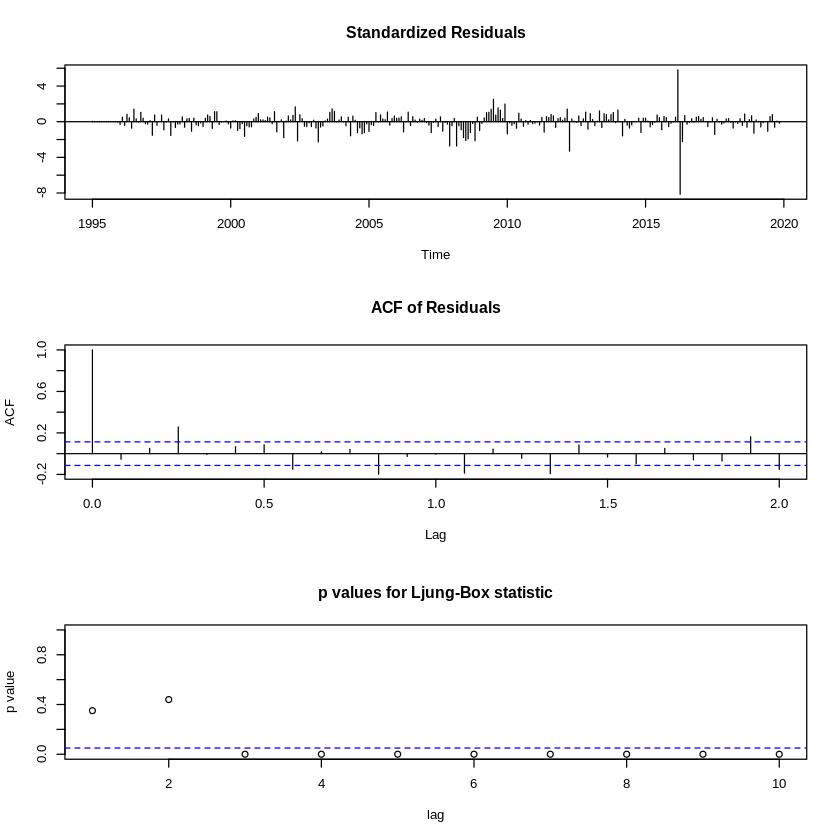

In [46]:
tsdiag (model)

In [49]:
fm=forecast(model, h=12)
fm

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Dec 2019       8.802186 8.667868 8.936505 8.596764 9.007608
Jan 2020       8.605261 8.444538 8.765983 8.359456 8.851065
Feb 2020       8.592269 8.408913 8.775625 8.311850 8.872688
Mar 2020       8.794200 8.590712 8.997687 8.482993 9.105407
Apr 2020       8.653621 8.431822 8.875420 8.314408 8.992833
May 2020       8.739366 8.500656 8.978076 8.374291 9.104442
Jun 2020       8.844192 8.589692 9.098692 8.454968 9.233416
Jul 2020       8.921811 8.652446 9.191177 8.509852 9.333771
Aug 2020       8.910842 8.627389 9.194295 8.477338 9.344346
Sep 2020       8.829181 8.532309 9.126053 8.375154 9.283208
Oct 2020       8.829388 8.519677 9.139099 8.355726 9.303050
Nov 2020       8.790850 8.468812 9.112888 8.298335 9.283365

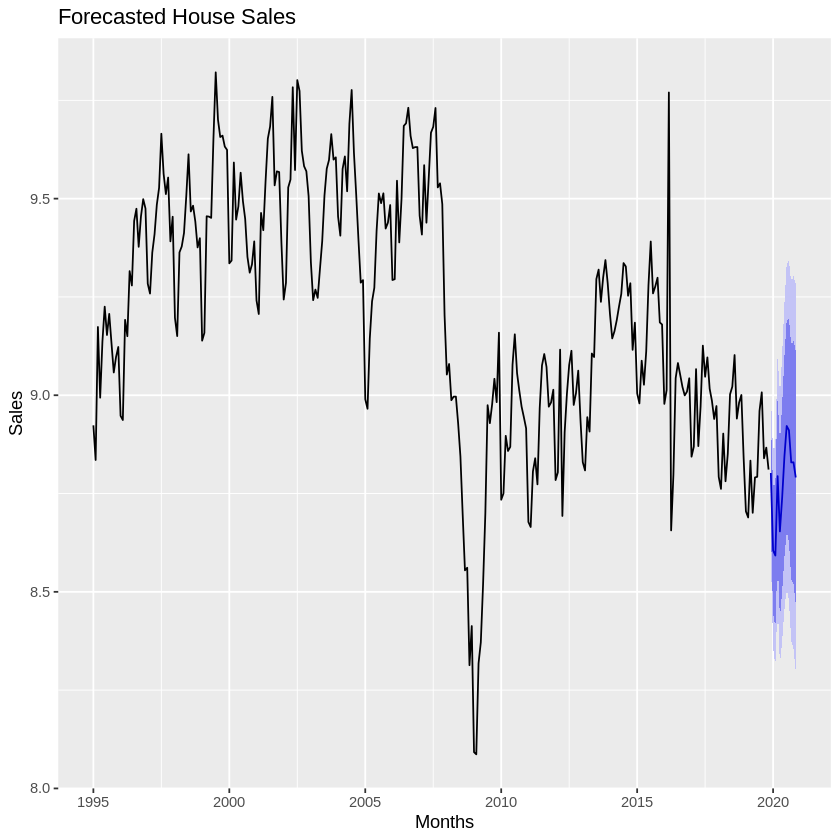

In [50]:
autoplot(fm, xlab = 'Months', ylab = 'Sales', 
main = 'Forecasted House Sales')